# 🛒 Análisis de Comportamiento de Compra — Retail Analytics

Este proyecto analiza un conjunto de datos de comportamiento de clientes en una tienda online, con información demográfica, historial de compras, estacionalidad, categorías de producto y métodos de pago.

El objetivo es:

- Entender qué factores influyen en el monto de compra.
- Identificar patrones por edad, género, temporada y categoría.
- Detectar segmentos de usuarios y oportunidades para optimizar ventas.
- Generar insights accionables para marketing, precios y retención.

El análisis incluye:  
✔ Limpieza de datos  
✔ EDA (análisis exploratorio)  
✔ Visualizaciones  
✔ Comparaciones estadísticas  
✔ Conclusiones y recomendaciones  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.describe(include='all') 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [9]:
# Valores nulos
df.isna().sum()

# Duplicados
df.duplicated().sum()

np.int64(0)

In [10]:
#estandarizar valores categóricos 
# Copia del DF original
df_clean = df.copy()

# Estandarizar texto
cols_object = df_clean.select_dtypes(include='object').columns

for col in cols_object:
    df_clean[col] = df_clean[col].str.strip().str.lower().str.replace('-', ' ').str.replace('_', ' ')

# Revisar cambios
df_clean[cols_object].head() 

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
0,male,blouse,clothing,kentucky,l,gray,winter,yes,express,yes,yes,venmo,fortnightly
1,male,sweater,clothing,maine,l,maroon,winter,yes,express,yes,yes,cash,fortnightly
2,male,jeans,clothing,massachusetts,s,maroon,spring,yes,free shipping,yes,yes,credit card,weekly
3,male,sandals,footwear,rhode island,m,maroon,spring,yes,next day air,yes,yes,paypal,weekly
4,male,blouse,clothing,oregon,m,turquoise,spring,yes,free shipping,yes,yes,paypal,annually


In [11]:
#Correciones específicas por columna 
# Gender
df_clean['Gender'] = df_clean['Gender'].replace({
    'male': 'Male',
    'female': 'Female'
})

# Discount Applied
df_clean['Discount Applied'] = df_clean['Discount Applied'].replace({
    'yes': 'Yes',
    'no': 'No'
})

# Promo Code Used
df_clean['Promo Code Used'] = df_clean['Promo Code Used'].replace({
    'yes': 'Yes',
    'no': 'No'
})

# Subscription Status
df_clean['Subscription Status'] = df_clean['Subscription Status'].replace({
    'yes': 'Yes',
    'no': 'No'
})

In [12]:
#Detectar outliners numéricos 
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for col in numeric_cols:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    print(col, "→ límites:", low, "-", high) 

Age → límites: -8.0 - 96.0
Purchase Amount (USD) → límites: -24.0 - 144.0
Review Rating → límites: 1.1499999999999997 - 6.3500000000000005
Previous Purchases → límites: -24.5 - 75.5


In [13]:
df_clean.to_csv('shopping_behavior_clean.csv', index=False)
df_clean.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,blouse,clothing,53,kentucky,l,gray,winter,3.1,Yes,express,Yes,Yes,14,venmo,fortnightly
1,2,19,Male,sweater,clothing,64,maine,l,maroon,winter,3.1,Yes,express,Yes,Yes,2,cash,fortnightly
2,3,50,Male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,Yes,free shipping,Yes,Yes,23,credit card,weekly
3,4,21,Male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,Yes,next day air,Yes,Yes,49,paypal,weekly
4,5,45,Male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,Yes,free shipping,Yes,Yes,31,paypal,annually


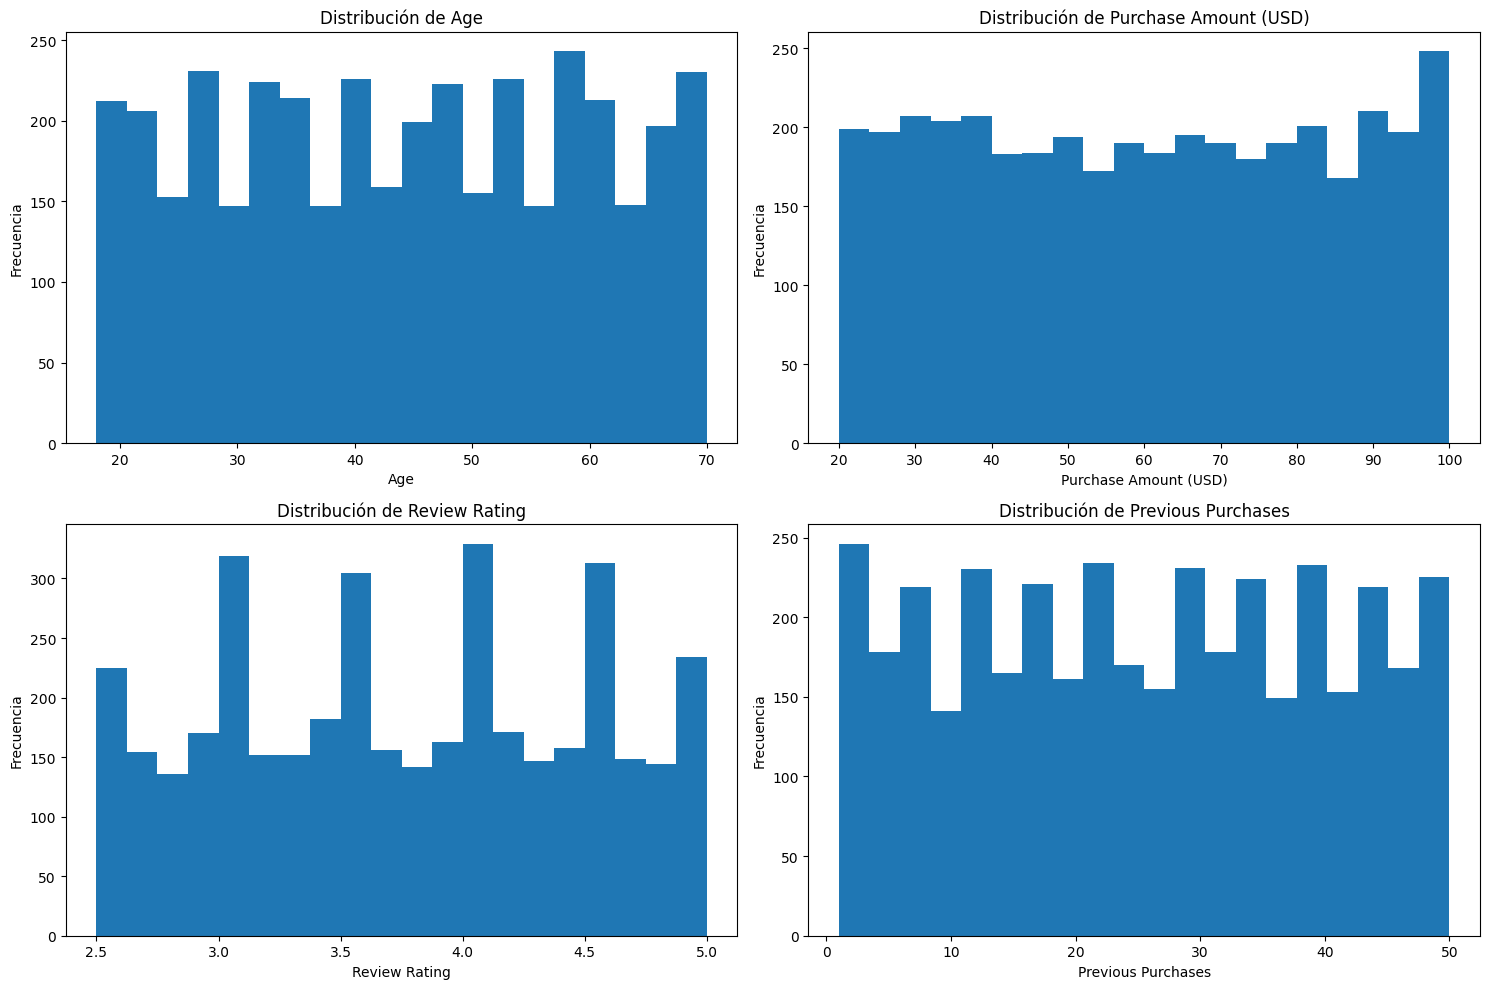

In [14]:
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_clean[col], bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

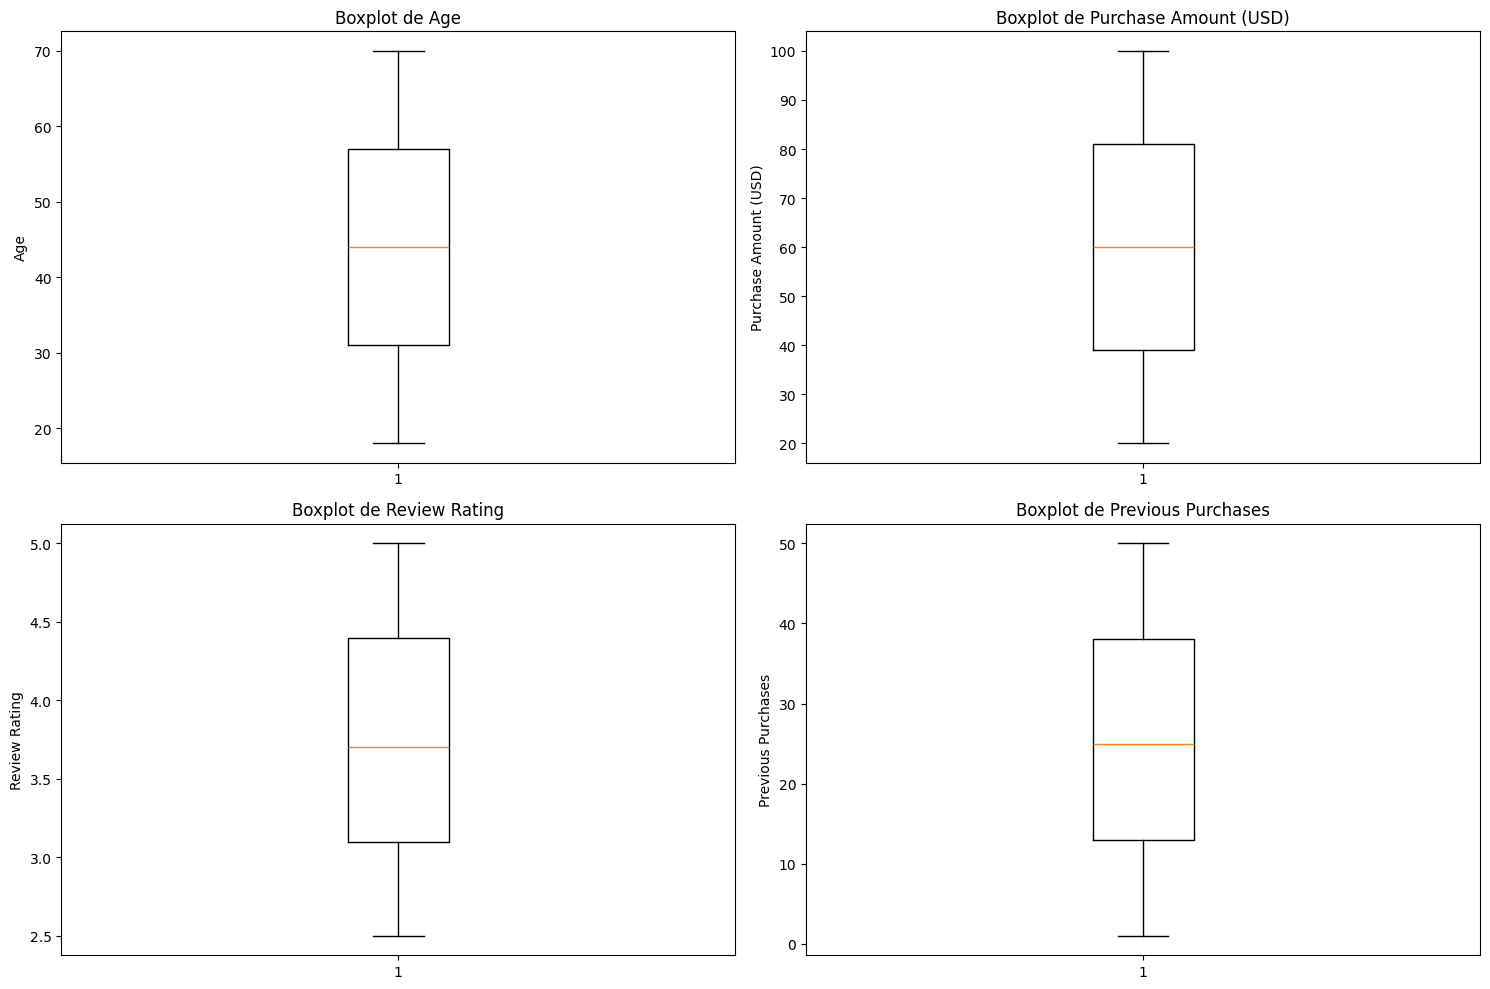

In [15]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_clean[col], vert=True)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

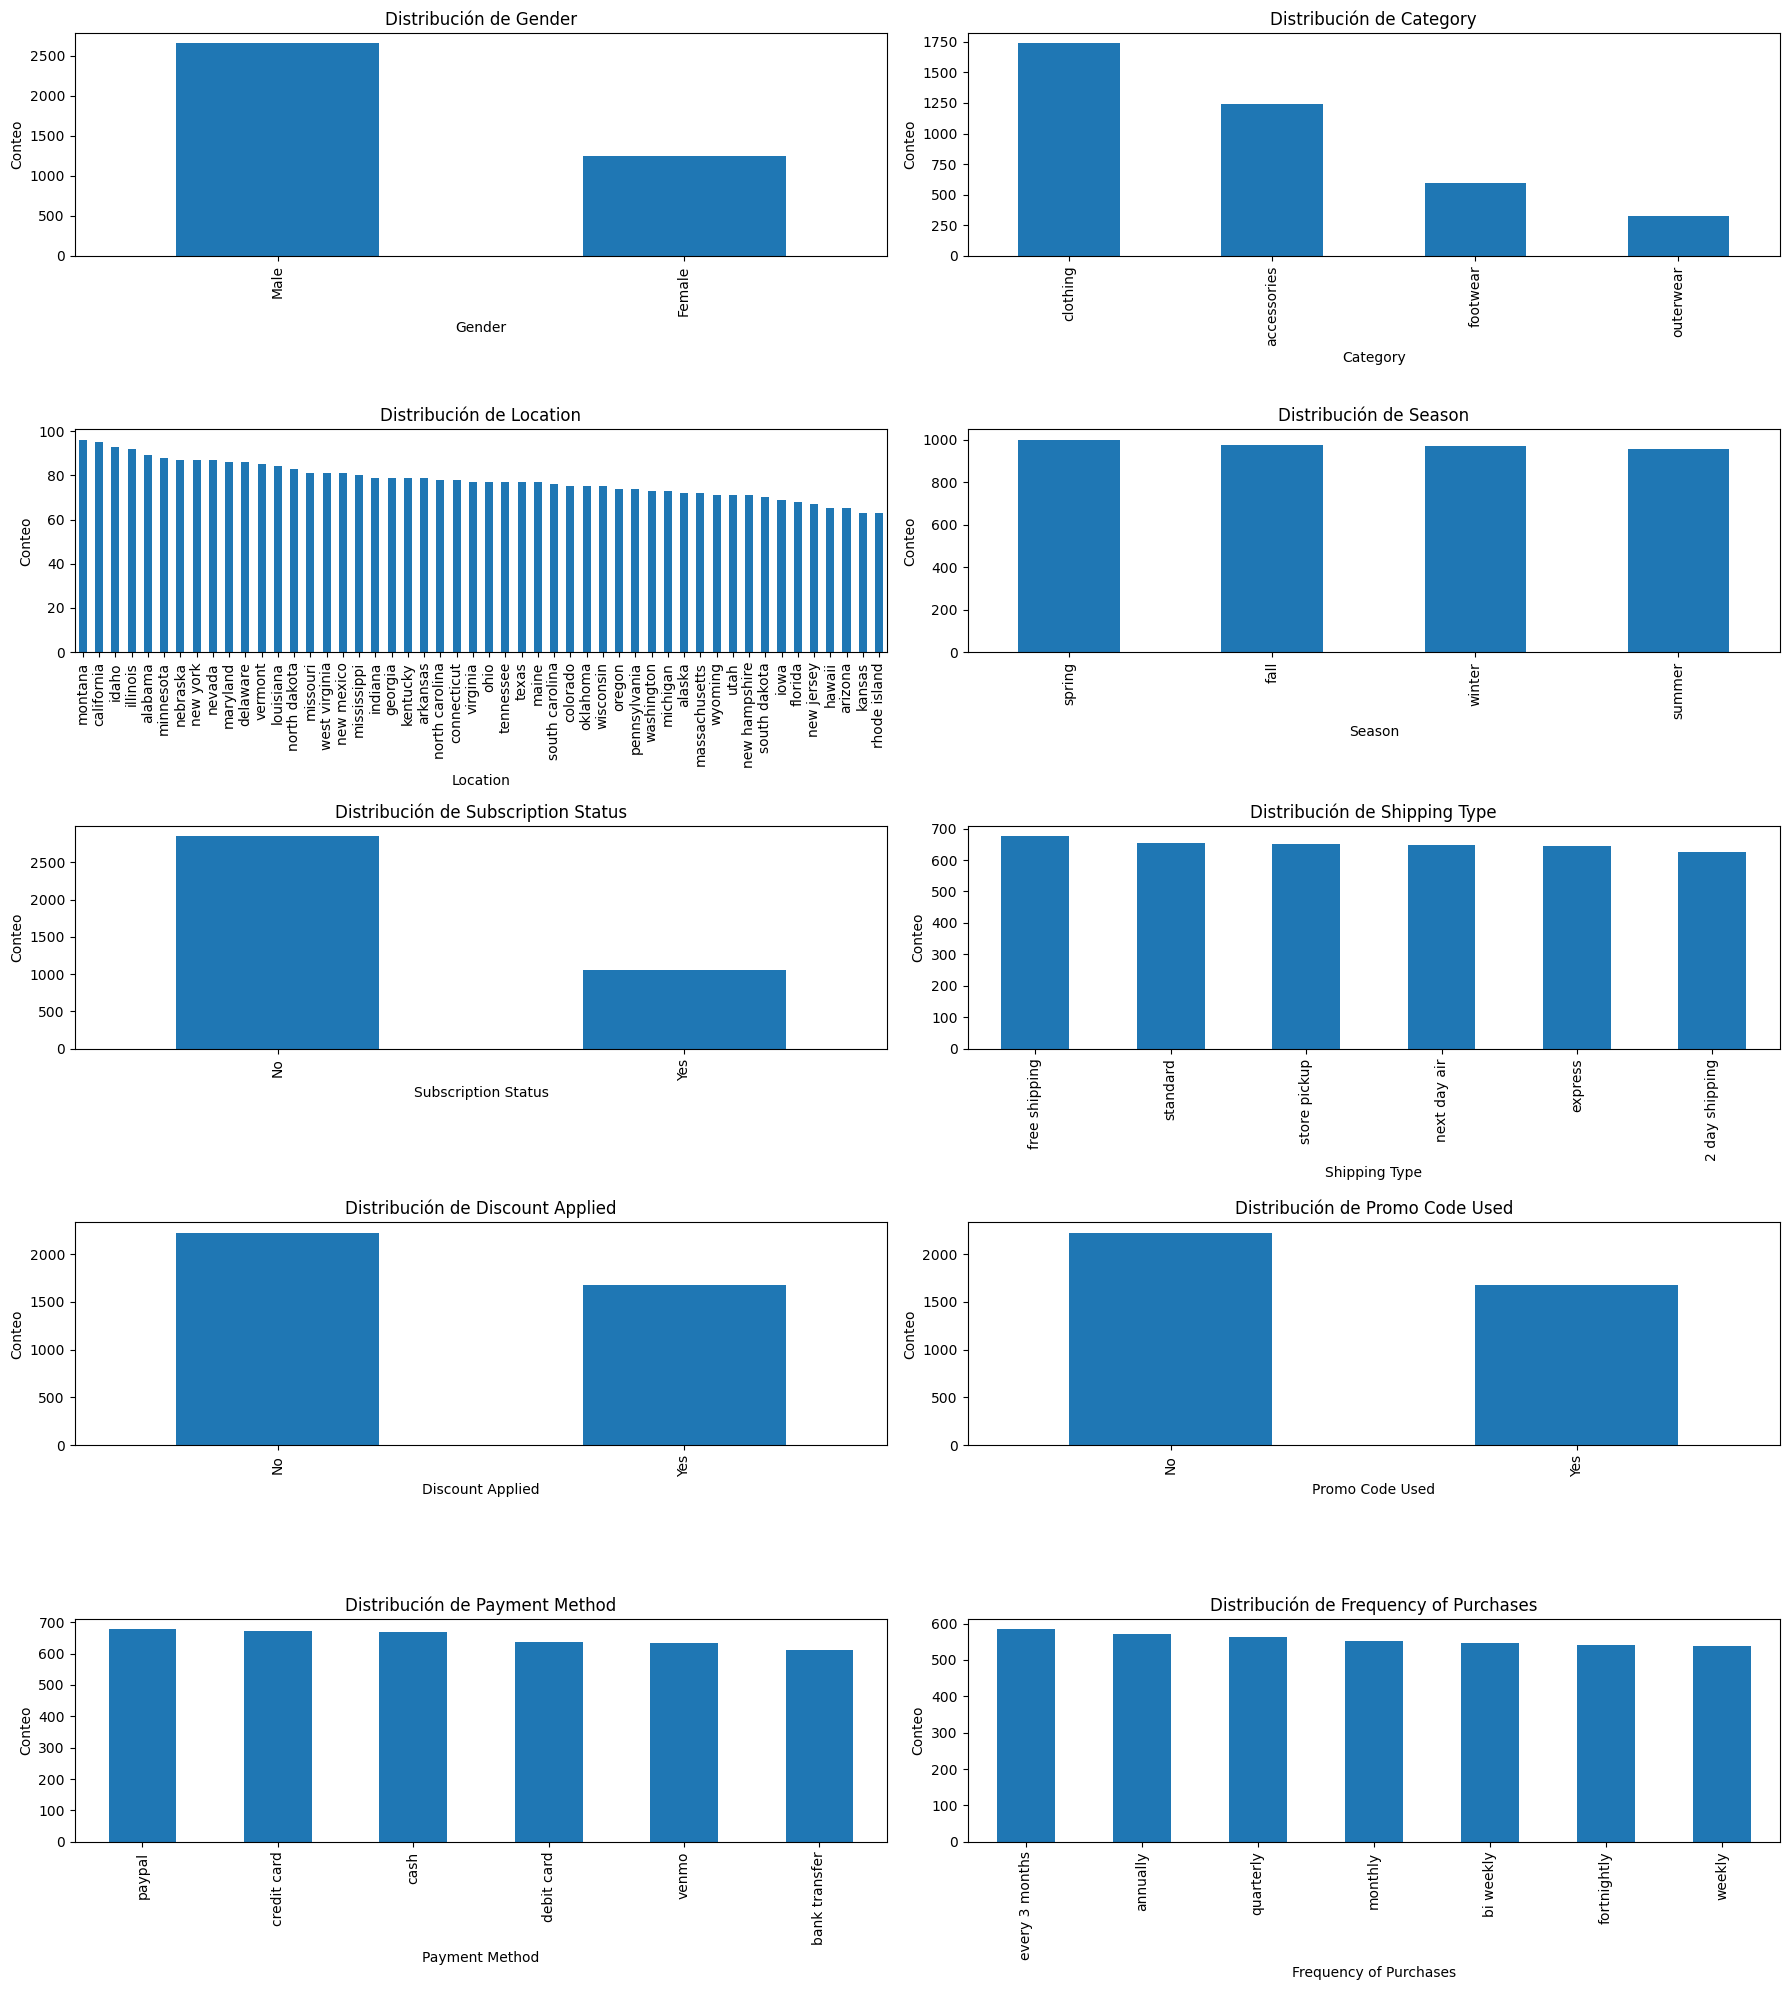

In [16]:
cat_cols = ['Gender', 'Category', 'Location', 'Season', 'Subscription Status',
            'Shipping Type', 'Discount Applied', 'Promo Code Used', 
            'Payment Method', 'Frequency of Purchases']

plt.figure(figsize=(18, 20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    df_clean[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show() 

In [17]:
#Promedio gastado por categoría 
df_clean.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False) 

Category
footwear       60.255426
clothing       60.025331
accessories    59.838710
outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [18]:
#Promedio gastado por descuento 
df_clean.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

In [19]:
#Promedio gastado según su suscripción 
df_clean.groupby('Subscription Status')['Purchase Amount (USD)'].mean() 

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [20]:
# Promedio gastado por género 
df_clean.groupby('Gender')['Purchase Amount (USD)'].mean()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

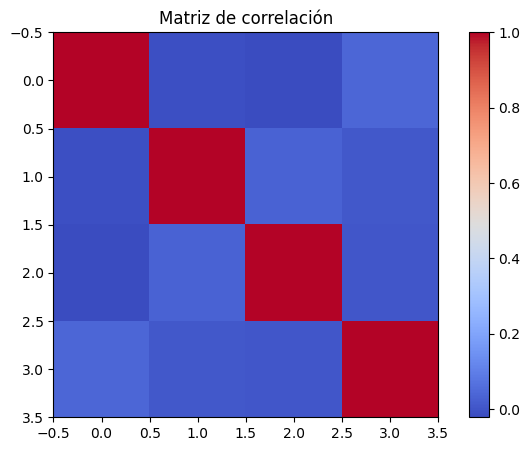

In [21]:
#Correlación numérica 
plt.figure(figsize=(8,5))
plt.imshow(df_clean[numeric_cols].corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()

# Conclusión

El análisis del dataset shopping_behavior_updated permitió comprender de manera integral los patrones de compra de 3,900 clientes y las variables que influyen en su comportamiento dentro del proceso de adquisición de productos. Tras la limpieza, validación y exploración sistemática de los datos, se observa que el conjunto está estructurado, sin valores nulos ni outliers significativos, lo que brinda una base sólida para análisis descriptivo y posterior modelado.

Los resultados revelan que la mayor parte de los clientes son hombres y que la categoría Clothing concentra la mayor cantidad de compras. El ticket promedio se mantiene dentro de un rango estable (20–100 USD), y tanto la calificación promedio como la distribución de compras previas sugieren una clientela relativamente satisfecha y con hábitos de compra constantes. Las métricas descriptivas muestran comportamiento similar entre géneros y temporadas, mientras que variables como descuentos, tipo de envío y suscripción presentan diferencias claras en el gasto promedio, evidenciando su relevancia para campañas segmentadas.

Las relaciones entre variables numéricas presentan correlaciones bajas, lo que indica que el comportamiento de compra depende principalmente de factores categóricos, como promociones, métodos de pago y categoría del producto. Esto abre oportunidades para futuros análisis como modelos de clasificación, segmentación de clientes o predicción de gasto.

En conjunto, el estudio proporciona una visión clara y accionable del comportamiento del consumidor. Los hallazgos apoyan estrategias de marketing basadas en segmentación, optimización de promociones y mejora en políticas de fidelización. Este análisis establece una base sólida para profundizar en modelos predictivos y decisiones estratégicas basadas en datos.